# Mastering-CSV-Handling-with-pandas

🔹 Basic Reading

In [ ]:
import pandas as pd

# 1. Read full CSV
df = pd.read_csv("file.csv")

# 2. Read only first 10 rows
df = pd.read_csv("file.csv", nrows=10)

# 3. Assign custom column names
df = pd.read_csv("file.csv", names=["A", "B", "C", "D"])

# 4. Read without header row
df = pd.read_csv("file.csv", header=None,skiprows=1)

# 5. Display top 5 and bottom 5 rows
print(df.head())
print(df.tail())


🔹 Skip/Select Rows 

In [ ]:
# 6. Skip first 2 rows
df = pd.read_csv("file.csv", skiprows=2)

# 7. Skip every alternate row
df = pd.read_csv("file.csv", skiprows=lambda x: x % 2 != 0)

# 8. Start from 3rd data row (skip header + 2 rows)
df = pd.read_csv("file.csv", skiprows=[1, 2])

# 9. Skip rows 1, 5, and 10 only
df = pd.read_csv("file.csv", skiprows=[1, 5, 10])

# 10. Read rows 5–15
df = pd.read_csv("file.csv", skiprows=range(1, 5), nrows=11)


🔹 Column Filtering

In [ ]:
# 11. Read specific columns by index
df = pd.read_csv("file.csv", usecols=[0, 2, 4])

# 12. Read specific columns by name
df = pd.read_csv("file.csv", usecols=["Email", "Purchase Price"])

# 13. Rename selected columns while reading
df = pd.read_csv("file.csv", usecols=["Email", "Purchase Price"])
df.rename(columns={"Email": "User_Email", "Purchase Price": "Price"}, inplace=True)

# 14. Drop unnecessary columns
cols_to_keep = ["Name", "Country"]
df = pd.read_csv("file.csv", usecols=cols_to_keep)

# 15. Reorder columns
df = pd.read_csv("file.csv")
df = df[["Country", "Email", "Name", "Purchase Price"]]


🔹 Delimiters and Quotes

In [ ]:
# 16. ; as delimiter
df = pd.read_csv("file.csv", sep=';')

# 17. Tab-delimited
df = pd.read_csv("file.csv", sep='\t')

# 18. Pipe-delimited
df = pd.read_csv("file.csv", sep='|')

# 19. Handle quoted strings
df = pd.read_csv("file.csv", quotechar='"')

# 20. Fix mixed delimiters (advanced handling with regex or preprocessing required)
# Example: replace | with , then read
with open("file.csv", "r") as f:
    lines = [line.replace("|", ",") for line in f]
with open("fixed_file.csv", "w") as f:
    f.writelines(lines)
df = pd.read_csv("fixed_file.csv")


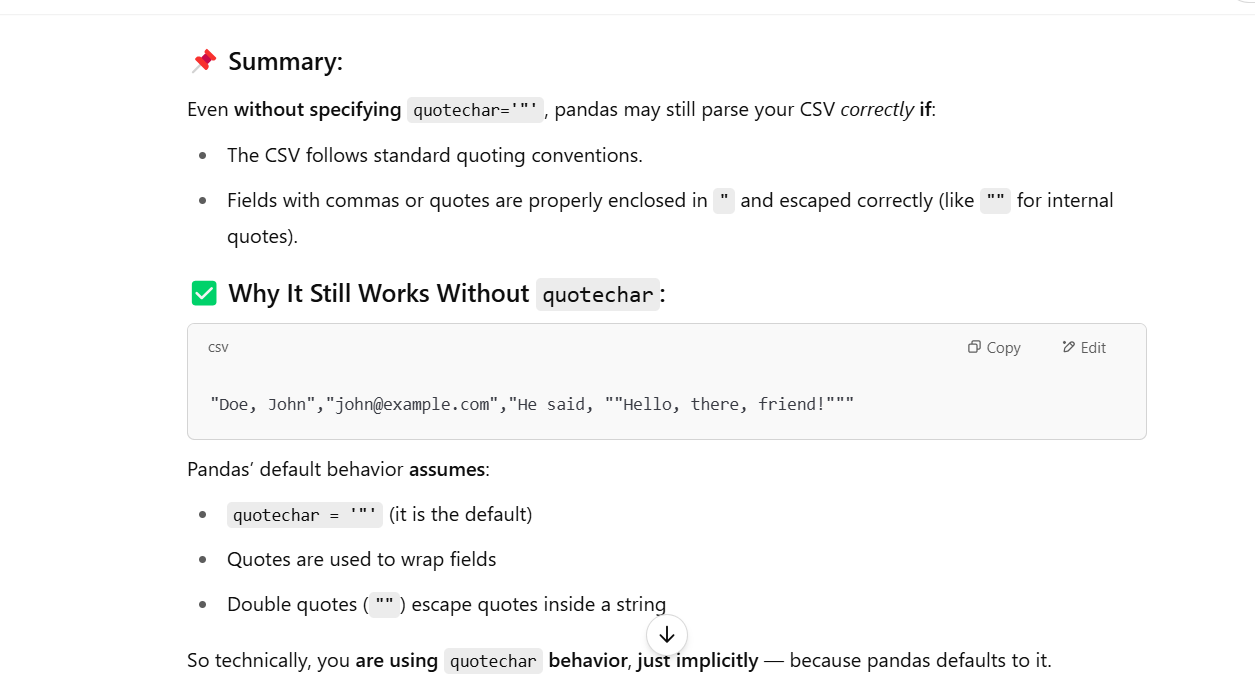

🔹 Encodings and Errors

In [ ]:
# 21. latin-1 encoding
df = pd.read_csv("file.csv", encoding='latin-1')

# 22. utf-16 encoding
df = pd.read_csv("file.csv", encoding='utf-16')

# 23. Skip corrupted rows
df = pd.read_csv("file.csv", on_bad_lines='skip')

# 24. No headers
df = pd.read_csv("file.csv", header=None)


#### "Safe File Reader with Encoding Detection for CSV, Excel, and JSON Files"

In [ ]:
import chardet
import pandas as pd

def detect_encoding(file_path):
    """
    Detect the encoding of a file using chardet.
    Returns the encoding of the file.
    """
    with open(file_path, "rb") as f:
        result = chardet.detect(f.read(100000))  # Read first 100,000 bytes for detection
        encoding = result['encoding']
        confidence = result['confidence']
        print(f"Detected Encoding for {file_path}: {encoding} (Confidence: {confidence * 100:.2f}%)")
        return encoding

def read_file_with_encoding(file_path):
    """
    Detect file encoding and read it safely with pandas (supports CSV, Excel, JSON, etc.).
    """
    encoding = detect_encoding(file_path)
    
    # For CSV files
    if file_path.endswith('.csv'):
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print("✅ CSV file loaded successfully.")
            return df
        except Exception as e:
            print(f"❌ Failed to read CSV file: {e}")
            return None

    # For Excel files (.xls, .xlsx)
    elif file_path.endswith(('.xls', '.xlsx')):
        try:
            df = pd.read_excel(file_path, encoding=encoding)
            print("✅ Excel file loaded successfully.")
            return df
        except Exception as e:
            print(f"❌ Failed to read Excel file: {e}")
            return None
    
    # For JSON files
    elif file_path.endswith('.json'):
        try:
            df = pd.read_json(file_path, encoding=encoding)
            print("✅ JSON file loaded successfully.")
            return df
        except Exception as e:
            print(f"❌ Failed to read JSON file: {e}")
            return None

    # Add other file type handling here if needed
    else:
        print("❌ Unsupported file type.")
        return None

# Usage
file_path = "your_file.json"  # Change this to your file path
df = read_file_with_encoding(file_path)
if df is not None:
    print(df.head())  # Display first 5 rows of the dataframe


# What is chardet?

`chardet` is a Python library used to detect the encoding of a given byte string or file. It is particularly useful when working with text data in various file formats (e.g., CSV, JSON, TXT, etc.) where the encoding may not be known beforehand. By using `chardet`, we can automatically determine the correct encoding, which allows us to read and process files accurately.

---

# Why Use chardet?

In data processing, we often deal with text data from different sources or in various languages. The encoding of the file is not always provided, and incorrect encoding can lead to corrupt or unreadable data. `chardet` helps in automatically detecting the encoding of a file, making it easier to read and process the content in the correct format.

---

# How Does chardet Work?

`chardet` uses statistical methods to analyze byte sequences in a file and estimate the most likely encoding. The library applies a set of heuristics (rules based on byte patterns) to detect encodings. It compares the byte sequences to known encoding patterns and returns the most probable encoding, along with a confidence level indicating how certain it is of its detection.

---

# Output from chardet

When you use `chardet.detect()`, it returns a dictionary containing the following information:

- **encoding**: The most likely encoding detected (e.g., `utf-8`, `ISO-8859-1`, etc.).
- **confidence**: A float value between 0 and 1 that indicates the confidence level of the result. A value closer to 1 means higher confidence.
- **language** (optional): The language detected based on the encoding, though this may not always be available.

---

# How chardet is Useful

- **Detect Encoding of Unknown Files**: Files that come from unknown or unspecified sources often have unknown encodings. `chardet` can automatically detect the encoding, so you don’t need to worry about choosing the wrong one.
  
- **Handling Mixed Encodings**: If you have a set of files from various sources, `chardet` can detect each file’s encoding, allowing you to handle them accordingly.
  
- **Read Files Safely**: By using the detected encoding, you can safely read files without errors like `UnicodeDecodeError`.
  
- **Clean Corrupted Files**: Sometimes files are corrupted due to improper encoding. `chardet` can help identify the correct encoding, and you can fix the file by converting it to a consistent encoding (e.g., UTF-8).

---

# Limitations of chardet

- **Accuracy**: While `chardet` is quite accurate, it is not always 100% correct. It works based on statistical probabilities, which means there might be a chance it detects the wrong encoding.
  
- **Edge Cases**: For very rare encodings or files with inconsistent byte patterns, `chardet` might misidentify the encoding.
  
- **Confidence Level**: The confidence level is not always 1.0 (100%), so it's important to consider this when using the detected encoding.

---

# Best Practices for Using chardet

1. **Check the Confidence**: Always pay attention to the confidence level. A low confidence means the result might not be accurate.
  
2. **Use Known Encoding**: If you know the encoding in advance (e.g., UTF-8), it is always better to specify it directly when opening the file to avoid ambiguity.

3. **Test the Encoding**: Even if `chardet` suggests a high-confidence encoding, it is a good idea to test it with a small portion of the file to ensure it is read correctly.

---

# Conclusion

`chardet` is an incredibly useful tool for detecting the encoding of files, especially when working with data from different sources. By using `chardet`, you can automatically determine the correct encoding, ensuring that your files are processed without errors related to encoding mismatches. However, it’s important to remember that `chardet` is based on probabilities, and while it works well in most cases, it’s always good practice to verify the results, especially for important data.


🔹 Large File Handling

In [ ]:
# 25. Read in chunks

chunks=pd.read_csv("file_name.csv",chunksize=100)
for chunk in chunks:
    print(chunk.head(10))


# 26. Read first 5000 rows and save

df=pd.read_csv('file_name.csv',nrows=5000)
df.to_csv('df_with_5000rows.csv',index=False)


# 27. Iterate through chunks and calculate average

total=0
count=0

for chunk in pd.read_csv('file_name.csv',chunksize=300):
    total+=chunk['Price'].sum()
    count+=chunk['Price'].count()
average_price=total/count

print(f"Average Purchase Price: {average}")


🔹 Writing File

In [ ]:

# 28. Write selected columns
df = pd.read_csv("file.csv", usecols=["Email", "Country"])
df.to_csv("filtered.csv", index=False)

# 29. Filter rows by country and export
df = pd.read_csv("file.csv")
df[df["Country"] == "India"].to_csv("only_india.csv", index=False)

# 30. Drop rows with missing values and save
df = pd.read_csv("file.csv")
df.dropna().to_csv("cleaned_data.csv", index=False)


## ✅ 🔹 1–10: Advanced Reading & Preprocessing

In [ ]:

# 1. Read a CSV file with multi-line headers and flatten it.
df = pd.read_csv("file.csv", header=[0,1])
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# 2. Read a CSV file where some column names contain commas.
df = pd.read_csv("file.csv", quotechar='"')

# 3. Skip header and read from the 3rd row and assign your own column names.
df = pd.read_csv("file.csv", skiprows=2, names=["Name", "Age", "Salary"])

# 4. Automatically detect the separator (e.g., ,, ;, |) and load the file/Auto detect separator (using Python's csv.Sniffer)
import csv
with open('file.csv', 'r') as f:
    dialect = csv.Sniffer().sniff(f.read(1024))
df = pd.read_csv('file.csv', sep=dialect.delimiter)

# 5. Read rows where value > 1000
df = pd.read_csv("file.csv")
df = df[df["Amount"] > 1000]

# 6. Read first 1000 rows and infer types
df = pd.read_csv("file.csv", nrows=1000)
print(df.dtypes)

# 7. Handle columns with mixed data types in the same column (e.g., int + str).
df = pd.read_csv("file.csv", dtype=str)

# 8. Read a CSV and replace all missing values in one step while loading.
df = pd.read_csv("file.csv").fillna("N/A")

# 9. Read a CSV where headers are in row 2 and the first row is meta-info
 df = pd.read_csv("file.csv", skiprows=1, header=1)

# 10. Convert columns while reading (e.g., str to datetime, object to float).
df = pd.read_csv("file.csv", parse_dates=["Date"], dtype={"Amount": float})


## ✅ 🔹 11–20: Multiple Files & Folder Automation

In [ ]:
import glob
import os

# 11.Read and combine all CSV files in a folder using glob.glob
files = glob.glob("data/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# 12. Add filename as a new column for each file while merging.
df_all = pd.concat([pd.read_csv(f).assign(source=os.path.basename(f)) for f in files])

# 13. Merge files from nested folders (recursive file search).
files = glob.glob("data/**/*.csv", recursive=True)

# 14. Read only those files that contain the word "sales" in the filename.
files = [f for f in glob.glob("data/*.csv") if "sales" in os.path.basename(f)]

# 15. Count how many rows each file has and display a summary.
for f in files:
    print(f"{f}: {sum(1 for line in open(f)) - 1} rows")

# 16.Merge files only if they have the same column names.
dfs = [pd.read_csv(f) for f in files]
df = pd.concat([d for d in dfs if list(d.columns) == list(dfs[0].columns)], ignore_index=True)

# 17. Handle inconsistent column order between CSVs while merging.Handle inconsistent column order
df = pd.concat([pd.read_csv(f).sort_index(axis=1) for f in files], ignore_index=True)

# 18. Create a summary report of each file's column count and missing values.
for f in files:
    df = pd.read_csv(f)
    print(f"{f} → Columns: {len(df.columns)}, Missing: {df.isnull().sum().sum()}")

# 19. Create a CSV indexer: list all CSVs, sizes, row counts, and save the report.
summary = []
for f in files:
    df = pd.read_csv(f)
    summary.append({"file": os.path.basename(f), "size": os.path.getsize(f), "rows": df.shape[0]})
pd.DataFrame(summary).to_csv("index.csv", index=False)

# 20. Create a function that reads, cleans, and merges all .csv.gz files in a folder.
def read_clean_merge_gz(folder):
    files = glob.glob(f"{folder}/*.csv.gz")
    df = pd.concat([pd.read_csv(f).dropna() for f in files], ignore_index=True)
    return df


# What is `glob` in Python?

`glob` is a module in Python used to **find all the pathnames** matching a specified pattern according to the rules used by the Unix shell. It's especially useful for locating files and directories using wildcards.

---

## Why Use `glob`?

When working with file systems, especially in projects involving data, machine learning, or automation, you often need to:

- Access multiple files in a directory.
- Filter files based on extensions (e.g., `.csv`, `.txt`, `.jpg`).
- Handle dynamic filenames.

`glob` makes it easy to automate and handle such tasks **without manually listing or hardcoding file names**.

---

## How `glob` Works

You specify a **pattern** using wildcards:

- `*` — Matches everything  
  e.g., `*.csv` matches all CSV files
- `?` — Matches any single character  
  e.g., `file?.txt` matches `file1.txt`, `fileA.txt`
- `[ ]` — Matches any character inside brackets  
  e.g., `file[1-3].txt` matches `file1.txt`, `file2.txt`, `file3.txt`

`glob.glob(pattern)` returns a list of pathnames matching the pattern.

---

## Common Use Cases

### 1. Get all `.csv` files in a folder
```python
import glob
files = glob.glob("data/*.csv")


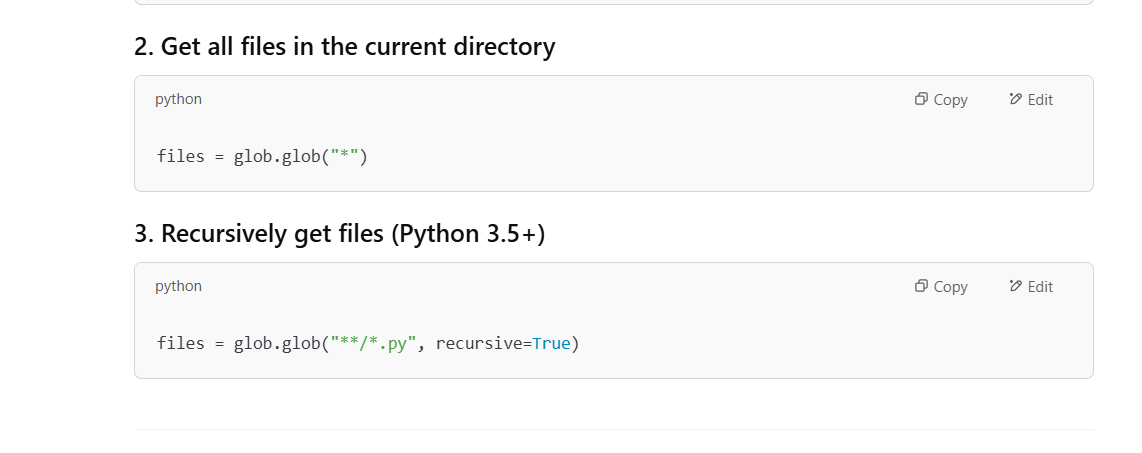

## Limitations of `glob`

- It only searches based on **patterns**, not on file contents.
- It doesn’t **sort** the result — you may need to use `sorted()` if order matters.

---

## When to Use `glob`

Use `glob` when:

- You need to **load or process multiple files automatically**.
- You’re working with **structured folders**.
- You want to **dynamically read file names**, e.g., in loops or pipelines.

---

## Summary

The `glob` module is a **simple but powerful** tool for finding files with pattern matching.  
It saves **time and effort** when dealing with multiple files and dynamic paths.


## 🔹 21–30: Error Handling & Encoding Challenges

In [ ]:
import logging
logging.basicConfig(level=logging.ERROR)

# 21. Try reading a file that doesn't exist and handle it gracefully with logging.
try:
    df = pd.read_csv("missing.csv")
except FileNotFoundError as e:
    logging.error(f"File not found: {e}")

# 22. Read a corrupted CSV and save only the successfully parsed rows.

try:
    df = pd.read_csv("corrupt.csv", on_bad_lines='skip')
except Exception as e:
    logging.error(f"Failed: {e}")

# 23. Handle a file that contains invisible characters or BOM (Byte Order Mark).
df = pd.read_csv("file.csv", encoding='utf-8-sig')

# 24. Handle files where some rows have extra columns.
df = pd.read_csv("file.csv", on_bad_lines='skip')

# 25. Fix and load a CSV where , appears within quoted string fields.
df = pd.read_csv("file.csv", quotechar='"')

# 26. Read a UTF-8 file with invalid characters using errors='replace'.
df = pd.read_csv("file.csv", encoding='utf-8', errors='replace')

# 27. Convert a CSV from 'latin-1' to 'utf-8' encoding.
with open("latin_file.csv", "r", encoding="latin-1") as f:
    content = f.read()
with open("utf8_file.csv", "w", encoding="utf-8") as f:
    f.write(content)

# 28. Log all errors encountered during file loading.
try:
    df = pd.read_csv("file.csv")
except Exception as e:
    logging.error(f"CSV load error: {e}")

# 29. Identify and report rows with incorrect column counts.
with open("file.csv") as f:
    for i, line in enumerate(f):
        if len(line.split(",")) != expected_col_count:
            print(f"Row {i+1} malformed")

# 30. Detect and remove rows with formulas or macros embedded (e.g., Excel exports).
df = pd.read_csv("excel_export.csv")
suspicious = df.apply(lambda x: x.astype(str).str.contains(r"^=").any(), axis=1)
df_clean = df[~suspicious]


## ✅ 🔹 31–40: Custom File Writing & Exporting

In [ ]:
# 31. Write only specific rows (e.g., Purchase > $10,000) to a new CSV.
df[df["Purchase"] > 10000].to_csv("high_value.csv", index=False)

# 32. Write a cleaned DataFrame to CSV, sorted by date.
df.dropna().sort_values("Date").to_csv("sorted_clean.csv", index=False)

# 33.Save a DataFrame with tab delimiter instead of comma.
df.to_csv("tab_output.csv", sep="\t", index=False)

# 34.Append new data to an existing CSV file using mode='a'.
df.to_csv("existing.csv", mode='a', index=False, header=False)

# 35. Export multiple DataFrames to multiple CSV files in a loop.
for i, df in enumerate([df1, df2, df3]):
    df.to_csv(f"output_{i}.csv", index=False)

# 36. Export a DataFrame to CSV with filename timestamped (2025_04_19_output.csv).
from datetime import datetime
ts = datetime.now().strftime("%Y_%m_%d")
df.to_csv(f"{ts}_output.csv", index=False)

# 37. Save a DataFrame to a compressed .zip CSV file.
df.to_csv("output.zip", compression="zip", index=False)

# 38. Create a backup of original file before writing new data.
import shutil
shutil.copy("file.csv", "file_backup.csv")
df.to_csv("file.csv", index=False)

# 39. Save filtered rows to CSV only if they meet a specific threshold.
df[df["Amount"] > 500].to_csv("filtered.csv", index=False)

# 40. Write log files containing the number of rows read and exported.
with open("log.txt", "w") as f:
    f.write(f"Rows read: {len(df)}\nExported to filtered.csv\n")


## ✅ 🔹 41–50: Memory Efficiency, Chunking & Real Projects

In [ ]:

# #Read a 1GB CSV using chunksize=10000 and process it in batches.



In [ ]:
# Calculate the total purchase price from all chunks.


In [ ]:

# Create a summary CSV of averages by country using chunks.



In [ ]:
# Track memory usage while loading a large file.



In [ ]:
# Load only necessary columns to reduce memory footprint.



In [ ]:
# Build a pipeline: Load → Clean → Transform → Save using functions.



In [ ]:
# Build a reusable CSV reader that handles 5 edge cases.



In [ ]:
# Read and clean a malformed CSV, then write cleaned output to new folder.



In [ ]:
# Validate column names and data types before loading.



In [ ]:
# Build a reusable script to load any CSV and generate a profiling report (e.g., using pandas-profiling or df.describe()).